In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

file_path = 'AmesHousing.csv'
data_set = pd.read_csv(file_path)

data_set = data_set._get_numeric_data()
data_set = data_set.dropna()

features = [
    'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 
    'Year Built', 'Year Remod/Add', 'Total Bsmt SF', 'Gr Liv Area', 
    'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 
    'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area'
]

data_set = data_set[features + ['SalePrice']]

y = data_set['SalePrice']
X = data_set.drop(columns=['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

new_data = pd.DataFrame({
    'Lot Frontage': [80],
    'Lot Area': [9600],
    'Overall Qual': [7],
    'Overall Cond': [5],
    'Year Built': [2003],
    'Year Remod/Add': [2004],
    'Total Bsmt SF': [856],
    'Gr Liv Area': [1710],
    'Full Bath': [2],
    'Half Bath': [1],
    'Bedroom AbvGr': [3],
    'Kitchen AbvGr': [1],
    'TotRms AbvGrd': [8],
    'Fireplaces': [1],
    'Garage Cars': [2],
    'Garage Area': [548]
})

new_price_pred = model.predict(new_data)
print(f'Predicted House Price: {new_price_pred[0]}')


Mean Squared Error: 1527029424.2260091
Predicted House Price: 226919.95406764047


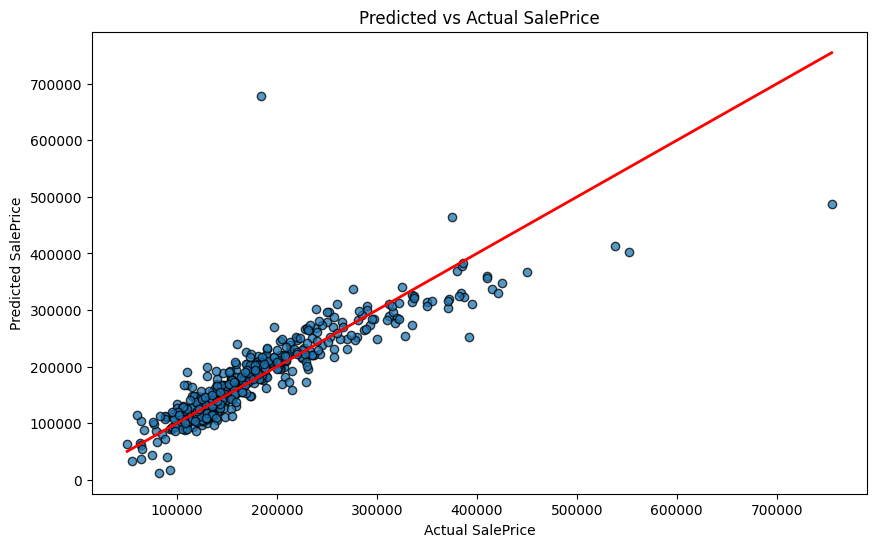

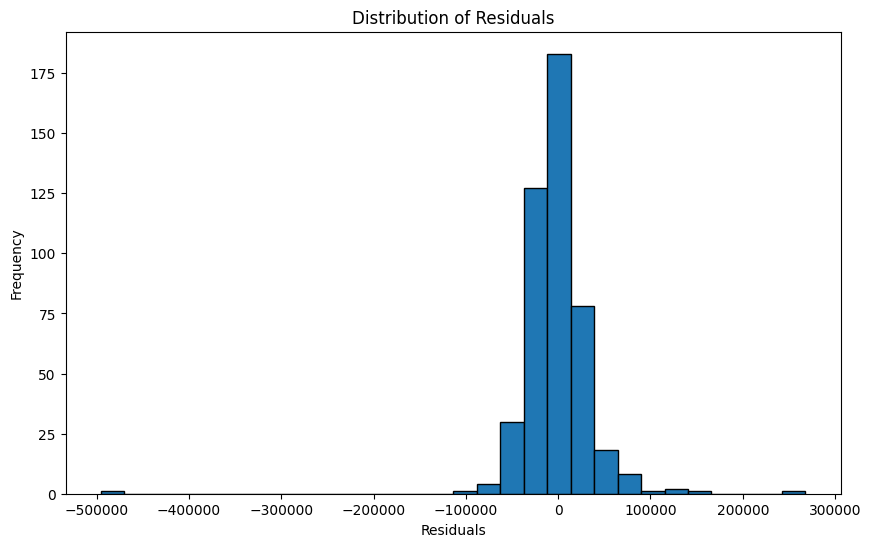

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='black', alpha=0.75)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Predicted vs Actual SalePrice')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()